# ORGANIZATION: THE SPARKS FOUNDATION

By: Monjok Joseph Terem

Domain: Data Science & Business Analytics

Program type:Graduate Rotational Internship Program(Remote)

Task:02.

# What is K-means Clustering


K-means clustering is an unsupervised machine learning algorithm used to partition a dataset into groups
or clusters based on their similiarity.It aims to find k cluster centriods in such a way that the within-
cluster sum of squares(WCSS) is minimized.The WCSS measures the compactness of the clusters,
and the algorithm iteratively assigns data points to the neareast centroid until convergence.




# Description

In the provided code,K-means clustering is applied to the iris dataset using scikit-learn.It determines the optimal number of clusters using the elbow method and Visualizes the resulting clusters,which contains measurements of different iris flower samples.The algorithm identifies Three(3) clusters in the data,representing three species of iris flowers:"Iris-Setosa","Iris-Versicolor", and "Iris-Virginca."The Scatter plot visualizes these three clusters and their centroids.
     


In [35]:
# Importing the required  libraries
#This code snippet imports the necessary libraries:Numpy for numerical operations.Matplotlib for plotting.
#Pandas for data manipulation,and scikit-learns datasets module for loading the iris dataset.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

# Load the iris dataset
df=pd.read_excel('C:/Users/Monjok J/Downloads/The Sparks Foundation completed Tasks/#Task2/Iris.xlsx')
print(df)


#This code helps to see every column with their respective rows using the pd.set_option()
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
5      6            5.4           3.9            1.7           0.4   
6      7            4.6           3.4            1.4           0.3   
7      8            5.0           3.4            1.5           0.2   
8      9            4.4           2.9            1.4           0.2   
9     10            4.9           3.1            1.5           0.1   
10    11            5.4           3.7            1.5           0.2   
11    12            4.8           3.4            1.6           0.2   
12    13            4.8           3.0            1.4           0.1   
13    14            

In [32]:
df.shape#This shows the number of rows and columns present in the dataset.

(150, 6)

In [36]:
df.to_dict()#Covert a dataframe to a dictionary.

{'Id': {0: 1,
  1: 2,
  2: 3,
  3: 4,
  4: 5,
  5: 6,
  6: 7,
  7: 8,
  8: 9,
  9: 10,
  10: 11,
  11: 12,
  12: 13,
  13: 14,
  14: 15,
  15: 16,
  16: 17,
  17: 18,
  18: 19,
  19: 20,
  20: 21,
  21: 22,
  22: 23,
  23: 24,
  24: 25,
  25: 26,
  26: 27,
  27: 28,
  28: 29,
  29: 30,
  30: 31,
  31: 32,
  32: 33,
  33: 34,
  34: 35,
  35: 36,
  36: 37,
  37: 38,
  38: 39,
  39: 40,
  40: 41,
  41: 42,
  42: 43,
  43: 44,
  44: 45,
  45: 46,
  46: 47,
  47: 48,
  48: 49,
  49: 50,
  50: 51,
  51: 52,
  52: 53,
  53: 54,
  54: 55,
  55: 56,
  56: 57,
  57: 58,
  58: 59,
  59: 60,
  60: 61,
  61: 62,
  62: 63,
  63: 64,
  64: 65,
  65: 66,
  66: 67,
  67: 68,
  68: 69,
  69: 70,
  70: 71,
  71: 72,
  72: 73,
  73: 74,
  74: 75,
  75: 76,
  76: 77,
  77: 78,
  78: 79,
  79: 80,
  80: 81,
  81: 82,
  82: 83,
  83: 84,
  84: 85,
  85: 86,
  86: 87,
  87: 88,
  88: 89,
  89: 90,
  90: 91,
  91: 92,
  92: 93,
  93: 94,
  94: 95,
  95: 96,
  96: 97,
  97: 98,
  98: 99,
  99: 100,
  100: 101,


# How do you find the optimum number of clusters for K Means? How does one determine the value of K?

C:\Users\Monjok J\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Monjok J\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Monjok J\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Monjok J\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory le

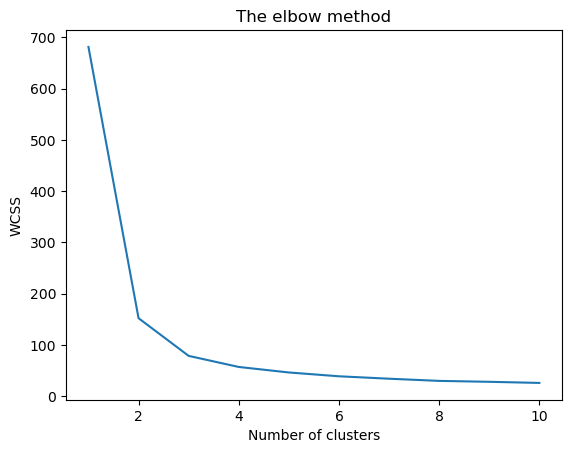

In [10]:
# Finding the optimum number of clusters for k-means classification

x = iris_df.iloc[:, [0, 1, 2, 3]].values#here,the iloc function is used to refrence the index to the data set for the first four rows.

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()


#This code performs k-means clustering and uses the elbow method to determine the optional number of clusters.
#It calculates the"Within-Cluster Sum Of Squares(WCSS)" for different numbers of clusters(ranging from 1to 10)
#and plots the results on a line graph.

#The elbow point on the graph represents the optional number of Clusters.

# You can clearly see why it is called 'The elbow method' from the above graph, the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.

From this we choose the number of clusters as ** '3**'.

In [ ]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

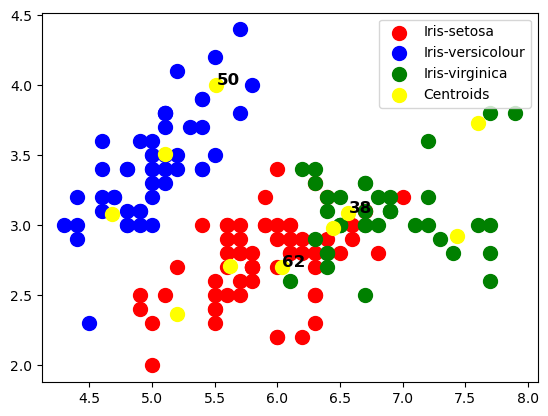

In [49]:
# Visualising the clusters - On the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

#Counting the number of Data Points in each cluster

cluster_labels,counts=np.unique(y_kmeans,return_counts=True)  
for cluster_label,count in zip(cluster_labels,counts):
        plt.text(kmeans.cluster_centers_[cluster_label,0],kmeans.cluster_centers_[cluster_label,1],
                str(count),fontsize=12,fontweight='bold',color='black')
        
        
        
        
    

# This concludes the K-Means Workshop.

Any questions?

In [ ]:
#Thank you for watching:)